In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [87]:
df = pd.read_csv('autochek.csv')

### Cleaning the data

In [89]:
df['mileage'].replace('', np.nan, inplace=True)
df['cylinders'].replace('', np.nan, inplace=True)

missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
year          0
brand         0
condition     0
mileage      37
cylinders    73
price         4
dtype: int64


In [88]:
summary_stats = df[['mileage', 'price']].describe()

print("Summary Statistics for Mileage and Price:")
print(summary_stats)

Summary Statistics for Mileage and Price:
       mileage    price
count     1254     1287
unique      79       82
top     306526  3105000
freq       110      110


## Explanation:

We selected the 'mileage' and 'price' columns from the dataset.
The describe() function computes common summary statistics (count, mean, std, min, max, and quartiles) for these numeric columns.
The output provides an overview of the distribution and spread of mileage and price in the dataset.

In [90]:
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce').fillna(0).astype(int)
df['price'] = pd.to_numeric(df['price'], errors='coerce').fillna(0).astype(int)
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce').fillna(0).astype(int)

### converting cells with 0 to mean

In [91]:
df['mileage'] = df['mileage'].replace(0, df['mileage'].mean()).astype(int)
df['price'] = df['price'].replace(0, df['price'].mean()).astype(int)
df['cylinders'] = df['cylinders'].replace(0, df['cylinders'].mean()).astype(int)

In [92]:
missing_data = df.isnull().sum()

df['mileage'].fillna(df['mileage'].mean(), inplace=True)
df['price'].fillna(df['price'].mean(), inplace=True)
df['cylinders'].fillna(df['cylinders'].mean(), inplace=True)

df['brand'] = df['brand'].str.strip()
df['condition'] = df['condition'].str.strip()

print("Missing Data Counts After Cleaning:")
print(missing_data)

Missing Data Counts After Cleaning:
year         0
brand        0
condition    0
mileage      0
cylinders    0
price        0
dtype: int64


### Explanation:

We used isnull().sum() to count the missing values in each column.
Missing values in 'mileage' and 'price' columns are filled with their respective means (you can choose other strategies based on your data).
We used str.strip() to remove extra whitespaces from the 'brand' and 'condition' columns, ensuring consistent formatting.


In [98]:

def remove_outliers_iqr(data, column, threshold=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    data_no_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data_no_outliers

df = remove_outliers_iqr(df, 'price',  threshold=1.5)

<Axes: >

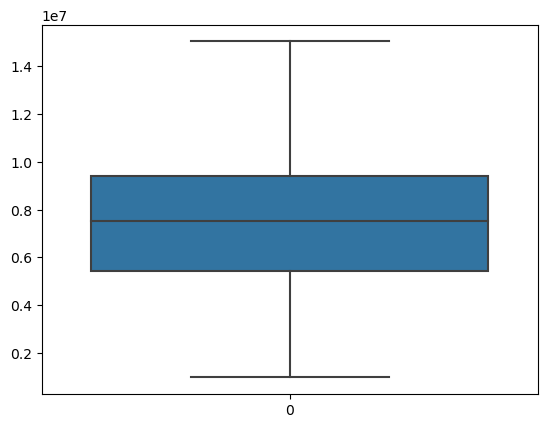

In [113]:
sns.boxplot(df.price)

In [100]:
df.head()

,year,brand,condition,mileage,cylinders,price
0,2012,Toyota Camry,Foreign Used,56732,5,8015000
1,2015,Toyota Corolla,Locally Used,56732,3,5815000
2,2022,SUZUKI Celerio GL,New,56732,3,11230000
5,2010,Toyota Camry,Foreign Used,56732,4,6015000
7,2009,Lexus RX 350,Foreign Used,56732,4,8515000


### Data Visualization:
We'll visualize the distribution of numeric features (mileage and price) using histograms and box plots.

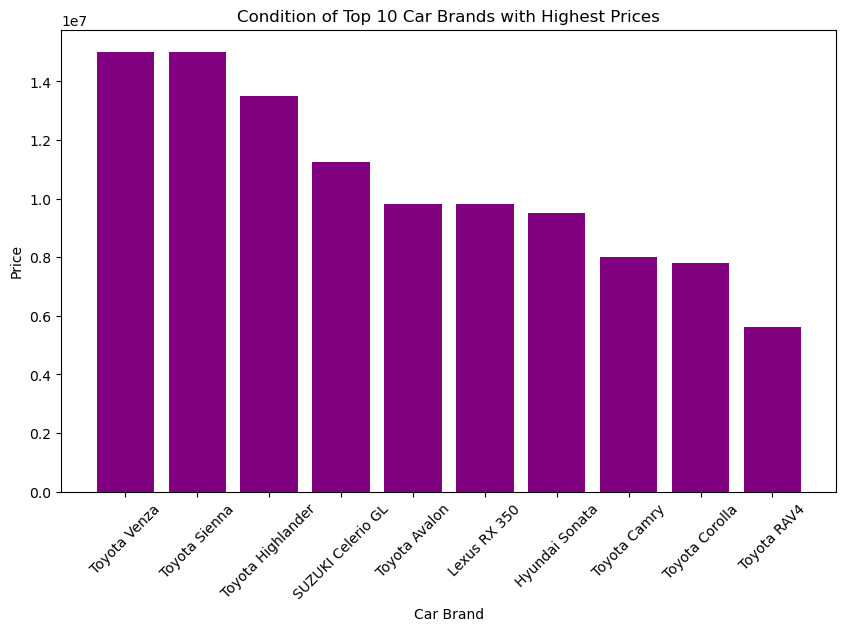

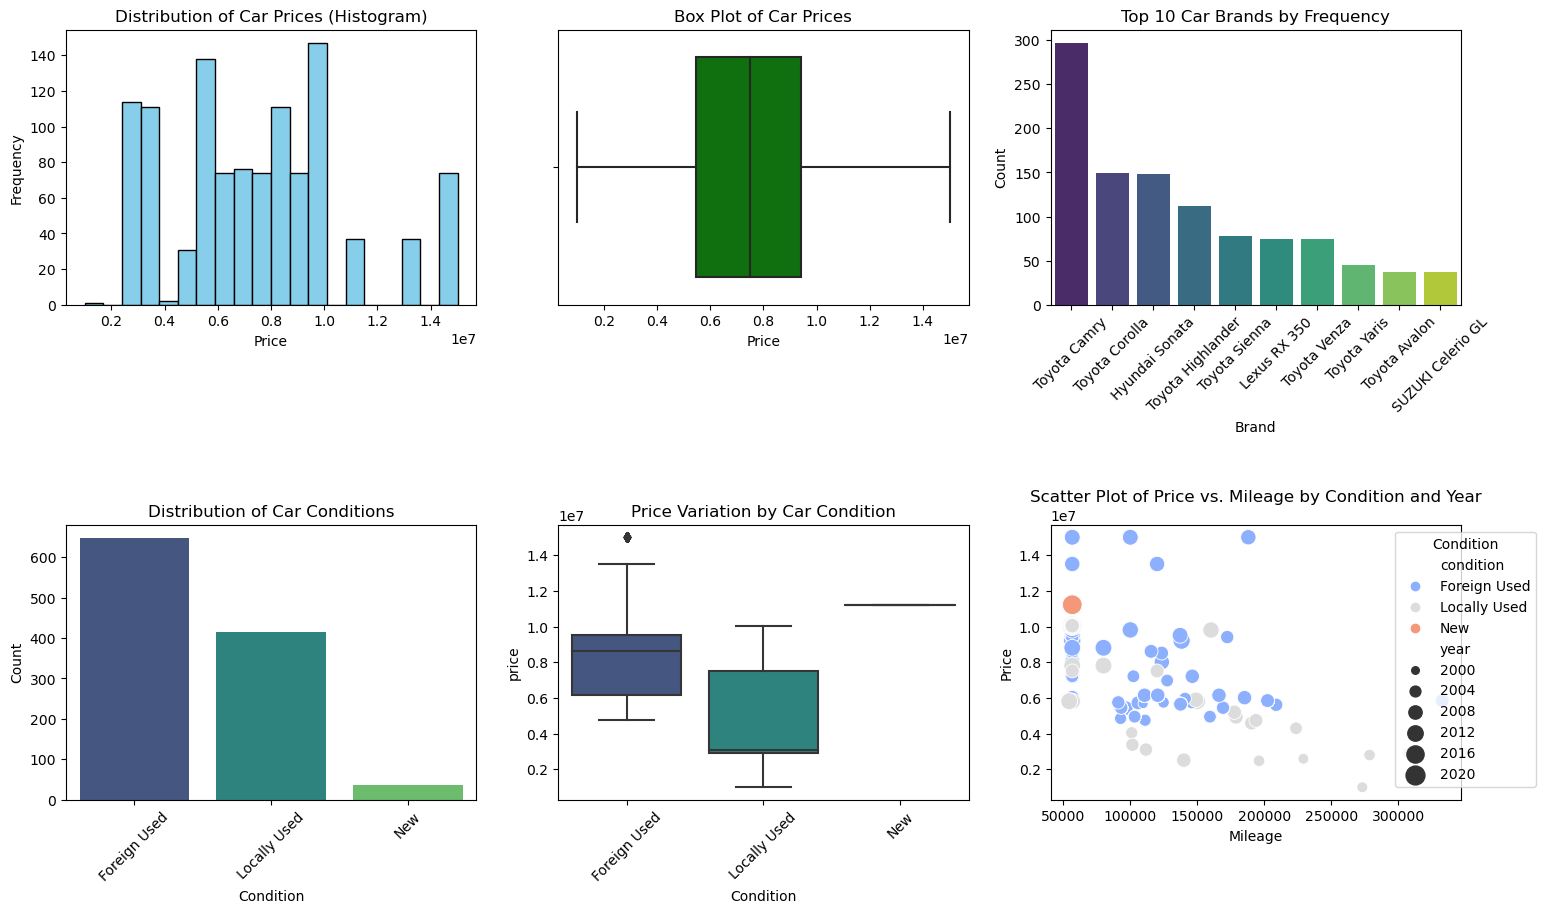

In [112]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Price Analysis (Histogram)
axes[0, 0].hist(df['price'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Car Prices (Histogram)')

# Price Analysis (Box Plot)
sns.boxplot(x='price', data=df, color='green', ax=axes[0, 1])
axes[0, 1].set_xlabel('Price')
axes[0, 1].set_title('Box Plot of Car Prices')

# Brand Analysis
brand_counts = df['brand'].value_counts().head(10)
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis', ax=axes[0, 2])
axes[0, 2].set_xlabel('Brand')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Top 10 Car Brands by Frequency')
axes[0, 2].tick_params(axis='x', rotation=45)

# Condition Analysis
condition_counts = df['condition'].value_counts()
sns.barplot(x=condition_counts.index, y=condition_counts.values, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_xlabel('Condition')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Distribution of Car Conditions')
axes[1, 0].tick_params(axis='x', rotation=45)

# Price Variation by Condition
sns.boxplot(x='condition', y='price', data=df, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_xlabel('Condition')
axes[1, 1].set_title('Price Variation by Car Condition')
axes[1, 1].tick_params(axis='x', rotation=45)

# Visualization (Scatter Plot)
sns.scatterplot(x='mileage', y='price', data=df, hue='condition', palette='coolwarm', size='year', sizes=(30, 200), ax=axes[1, 2])
axes[1, 2].set_xlabel('Mileage')
axes[1, 2].set_ylabel('Price')
axes[1, 2].set_title('Scatter Plot of Price vs. Mileage by Condition and Year')
axes[1, 2].legend(title='Condition', loc='upper right', bbox_to_anchor=(1.2, 1.0))

plt.subplots_adjust(hspace=0.8)


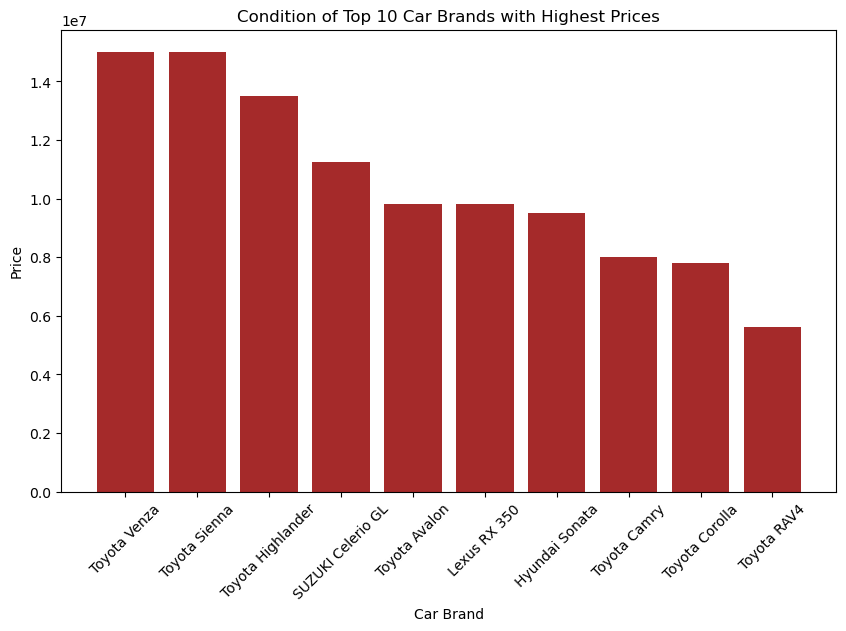

In [158]:
unique_brands = df['brand'].unique()

# Sort the DataFrame by 'Price' in descending order
df_sorted = df.sort_values(by='price', ascending=False)

# Get the top 10 car brands with the highest prices
top_10_highest_prices = df_sorted[df_sorted['brand'].isin(unique_brands[:10])]

# Create a bar chart to visualize the condition of the top 10 car brands
plt.figure(figsize=(10, 6))
plt.bar(top_10_highest_prices['brand'], top_10_highest_prices['price'], color='brown')
plt.xlabel('Car Brand')
plt.ylabel('Price')
plt.title('Condition of Top 10 Car Brands with Highest Prices')
plt.xticks(rotation=45)
plt.show()

The chart clearly illustrates the dominance of Toyota brands in the used car market, indicating that Toyota cars are among the most commonly traded and sought-after vehicles in this market segment. This dominance might be attributed to several factors, such as Toyota's reputation for producing reliable and durable vehicles, a wide range of models to choose from, and the availability of spare parts and service centers.

Within the Toyota brand, specific models stand out as the most expensive. In this case, the Venza, Sienna, and Highlander have the highest price tags among the Toyota vehicles. This difference in pricing within the same brand could be influenced by market demand, influenced by factors like fuel efficiency, safety features, advanced technology. Additionally, newer or better-condition instances of these models would drive up the prices.

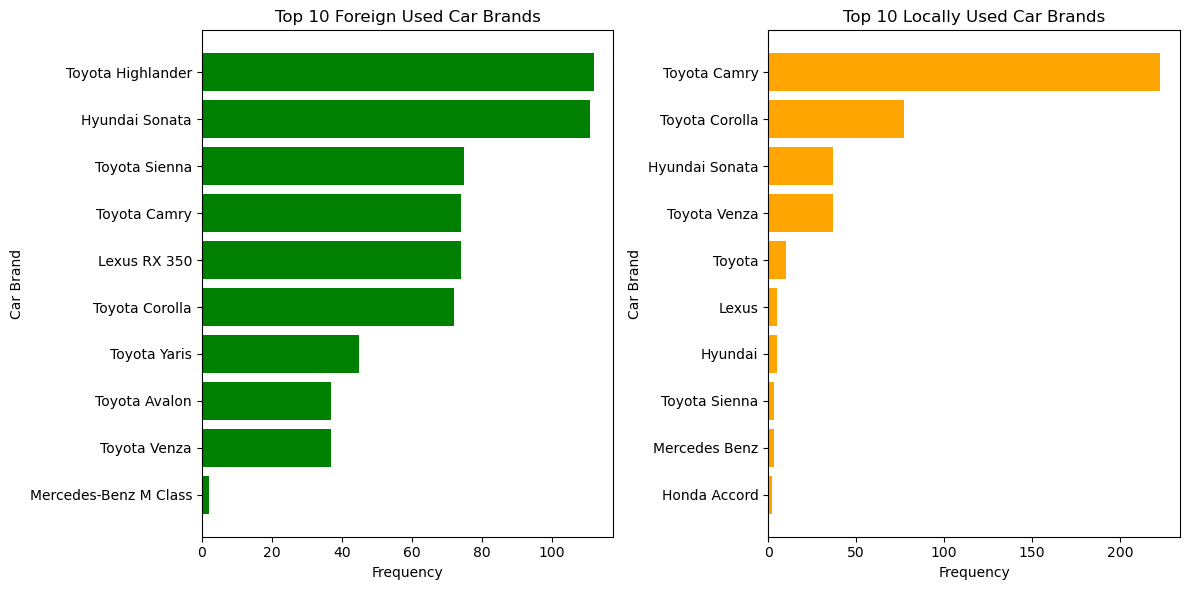

In [146]:
top_foreign_used_brands = foreign_used_cars['brand'].value_counts().nlargest(10)
top_locally_used_brands = locally_used_cars['brand'].value_counts().nlargest(10)

# Create bar charts for the top brands in each category by frequency
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(top_foreign_used_brands.index, top_foreign_used_brands.values, color='green')
plt.xlabel('Frequency')
plt.ylabel('Car Brand')
plt.title('Top 10 Foreign Used Car Brands')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(top_locally_used_brands.index, top_locally_used_brands.values, color='orange')
plt.xlabel('Frequency')
plt.ylabel('Car Brand')
plt.title('Top 10 Locally Used Car Brands')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()




The analysis of both locally and foreign-used cars in Lagos reveals some interesting insights about the car market in the city. While Toyota is clearly the most common brand overall, there are some intriguing patterns beneath the surface. Among locally used cars, Corolla and Camry are the standout favorites, suggesting that Lagos residents have a strong affinity for these models, possibly because of their reputation for reliability and affordability. On the foreign-used front, the Highlander and Hyundai Sonata take the lead, indicating that buyers of imported cars in Lagos may prioritize size, features, or performance when choosing their vehicles. These findings illustrate how the Lagos car market caters to a diverse range of preferences, showing that what people look for in a car can vary significantly, depending on whether they're buying a locally used or foreign-used vehicle.

In [161]:
top_foreign_used_brands = foreign_used_cars['brand'].value_counts().nsmallest(4)
top_locally_used_brands = locally_used_cars['brand'].value_counts().nsmallest(4)

# Create bar charts for the top brands in each category by frequency
print("Least 4 Foreign Used Car Brands:")
print(top_foreign_used_brands)


print("\nLeast 4 Locally Used Car Brands:")
print(top_locally_used_brands)



Least 4 Foreign Used Car Brands:
brand
Toyota Matrix      1
Hyundai Elantra    1
Toyota RAV4        1
Pontiac Vibe       1
Name: count, dtype: int64

Least 4 Locally Used Car Brands:
brand
Lexus RX 350            1
Lexus IS 2008           1
Toyota Highlander V6    1
Toyota RAV4             1
Name: count, dtype: int64


In [151]:
foreign_used_cars = df[df['condition'] == 'Foreign Used']
locally_used_cars = df[df['condition'] == 'Locally Used']

# Find the most expensive brands in each category
most_expensive_foreign_brands = foreign_used_cars.groupby('brand')['price'].max().nlargest(10)
most_expensive_locally_brands = locally_used_cars.groupby('brand')['price'].max().nlargest(10)

print("Most Expensive Brands in Foreign Used Cars:")
print(most_expensive_foreign_brands)

print("\nMost Expensive Brands in Locally Used Cars:")
print(most_expensive_locally_brands)

Most Expensive Brands in Foreign Used Cars:
brand
Toyota Sienna            15015000
Toyota Venza             15015000
Toyota Highlander        13515000
Lexus                    10051649
Toyota                   10051649
Toyota Avalon             9815000
Hyundai Sonata            9515000
Lexus RX 350              8615000
Toyota Camry              8015000
Mercedes-Benz M Class     6975000
Name: price, dtype: int64

Most Expensive Brands in Locally Used Cars:
brand
BMW              10051649
Ford             10051649
Honda            10051649
Hyundai          10051649
Kia cars         10051649
Lexus            10051649
Mercedes Benz    10051649
Nissan           10051649
Peugeot          10051649
Toyota           10051649
Name: price, dtype: int64


In [163]:
least_expensive_foreign_brands = foreign_used_cars.groupby('brand')['price'].min().nsmallest(10)
least_expensive_locally_brands = locally_used_cars.groupby('brand')['price'].min().nsmallest(10)

print("Least Expensive Brands in Foreign Used Cars:")
print(least_expensive_foreign_brands)

print("\nLeast Expensive Brands in Locally Used Cars:")
print(least_expensive_locally_brands)

Least Expensive Brands in Foreign Used Cars:
brand
Toyota Matrix        4750000
Toyota Corolla       4850000
Toyota Yaris         4950000
Hyundai Elantra      5432250
Toyota RAV4          5615350
Toyota Highland      5685000
Toyota Highlander    5685000
Pontiac Vibe         5725000
Toyota Camry LE      5750000
Toyota Sienna        5750000
Name: price, dtype: int64

Least Expensive Brands in Locally Used Cars:
brand
Toyota Camry             990000
Toyota Sienna           2475000
Honda Accord            2510156
Toyota Highlander V6    2795625
Lexus IS 2008           3375000
Toyota RAV4             4050000
Toyota Corolla          4740000
Hyundai Sonata          5815000
Toyota Venza            7515000
Lexus RX 350            9810000
Name: price, dtype: int64


Toyota Matrix, Toyota Corolla, and Toyota Yaris emerge as the top options for buyers on a budget. These vehicles offer affordability, reliability, and performance in one package. For locally used cars, Toyota Camry, Toyota Sienna, and Honda Accord are the top choices for those in search of affordable and dependable rides. This discovery underscores the versatility of renowned brands like Toyota and Honda, accommodating both the thrift-conscious and those in pursuit of well-trusted vehicles that won't break the bank.